In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats import inter_rater

In [24]:
## Raccolta dati da file

workers_answers = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_answers.csv")
workers_questionnaire = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_questionnaire.csv")
workers_dimensions_selection = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_dimensions_selection.csv")


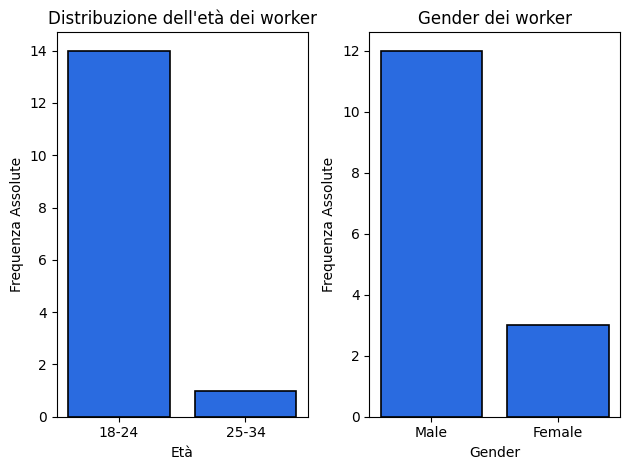

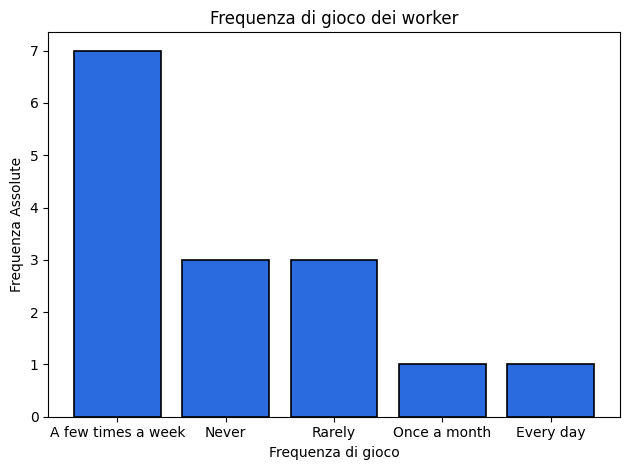

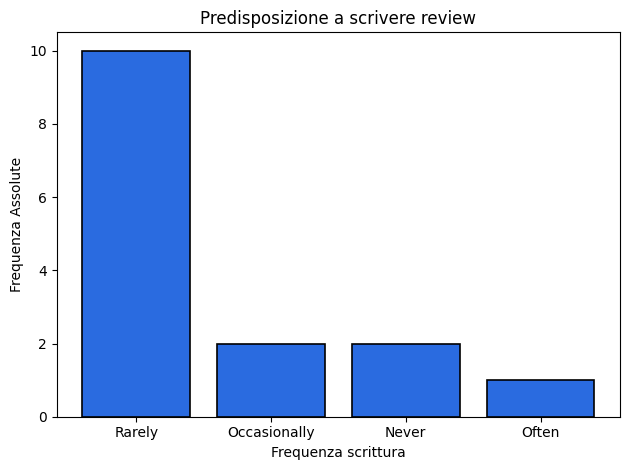

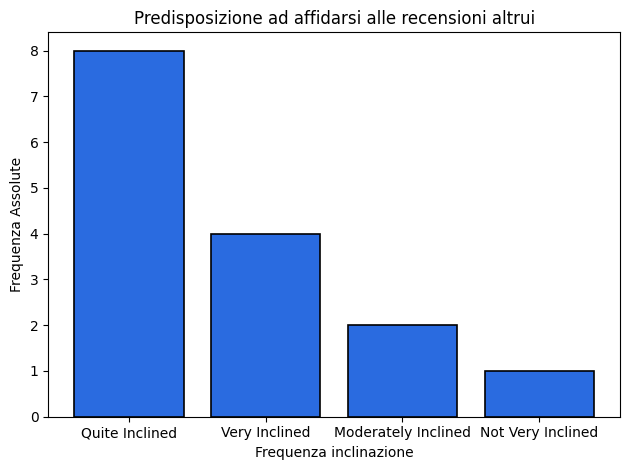

question_answer_text
Quite inclined (yes, they influence my purchase decision)    0.533333
Very inclined (yes, I decisively base my choices)            0.266667
Moderately inclined (yes, I consider them but not only)      0.133333
Not very inclined (no, I consider other factors)             0.066667
Name: count, dtype: float64


In [28]:
'''

4.b
Calcolate le frequenze relative delle risposte date dai lavoratori al questionario

'''

#Age

Age = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Age"]
absolute_frequencies_Age = Age['question_answer_text'].value_counts()
relative_frequencies_Age = absolute_frequencies_Age / len(Age)

# I dati relativi alle frequenze
categories = relative_frequencies_Age.index
frequencies = absolute_frequencies_Age.values

# Creazione del barplot
plt.subplot(1, 2, 1)
plt.bar(categories, frequencies, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Età')
plt.ylabel('Frequenza Assolute')
plt.title('Distribuzione dell\'età dei worker')

plt.tight_layout()

# Visualizzazione del barplot

''''''''''''''''''''''''''''''''''''''''''''''''
#Gender

Gender = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Gender"]
absolute_frequencies_Gender = Gender['question_answer_text'].value_counts()
relative_frequencies_Gender = absolute_frequencies_Gender / len(Gender)

# I dati relativi alle frequenze
categories = absolute_frequencies_Gender.index
frequencies = absolute_frequencies_Gender.values

# Creazione del barplot
plt.subplot(1, 2, 2)
plt.bar(categories, frequencies, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Gender')
plt.ylabel('Frequenza Assolute')
plt.title('Gender dei worker')

plt.tight_layout()
plt.savefig('plot/distribuzione_Eta_Gender.pdf')

# Visualizzazione del barplot
plt.show()

''''''''''''''''''''''''''''''''''''''''''''''''''
#Gaming_Frequency

Gaming_Frequency = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Gaming Frequency"]
absolute_frequencies_Gaming_Frequency = Gaming_Frequency['question_answer_text'].value_counts()
relative_frequencies_Gaming_Frequency = absolute_frequencies_Gaming_Frequency / len(Gaming_Frequency)

# I dati relativi alle frequenze
categories = absolute_frequencies_Gaming_Frequency.index
frequencies = absolute_frequencies_Gaming_Frequency.values

# Creazione del barplot
plt.bar(categories, frequencies, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Frequenza di gioco')
plt.ylabel('Frequenza Assolute')
plt.title('Frequenza di gioco dei worker')

plt.tight_layout()
plt.savefig('plot/distribuzione_Gaming_Frequency.pdf')

# Visualizzazione del barplot
plt.show()

''''''''''''''''''''''''''''''''''''''''''''''''''
#Write_Reviews

Write_Reviews = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Reliance on Reviews"]
absolute_frequencies_Write_Reviews = Write_Reviews['question_answer_text'].value_counts()
relative_frequencies_Write_Reviews = absolute_frequencies_Write_Reviews / len(Write_Reviews)
# I dati relativi alle frequenze
categories = absolute_frequencies_Write_Reviews.index
frequencies = absolute_frequencies_Write_Reviews.values

# Creazione del barplot
plt.bar(categories, frequencies, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Frequenza scrittura')
plt.ylabel('Frequenza Assolute')
plt.title('Predisposizione a scrivere review')
plt.xticks(categories, ['Rarely', 'Occasionally', 'Never', 'Often'])


plt.tight_layout()
plt.savefig('plot/distribuzione_Write_Reviews.pdf')

# Visualizzazione del barplot
plt.show()

''''''''''''''''''''''''''''''''''''''''''''''''''
# Trust_Review

Trust_Reviews = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Trust in Reviews"]
absolute_frequencies_Trust_Reviews = Trust_Reviews['question_answer_text'].value_counts()
relative_frequencies_Trust_Reviews = absolute_frequencies_Trust_Reviews / len(Trust_Reviews)
# I dati relativi alle frequenze
categories = absolute_frequencies_Trust_Reviews.index
frequencies = absolute_frequencies_Trust_Reviews.values

# Creazione del barplot
plt.bar(categories, frequencies, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Frequenza inclinazione')
plt.ylabel('Frequenza Assolute')
plt.title('Predisposizione ad affidarsi alle recensioni altrui')
plt.xticks(categories, ['Quite Inclined', 'Very Inclined', 'Moderately Inclined', 'Not Very Inclined'])

plt.tight_layout()
plt.savefig('plot/distribuzione_Trust_Review.pdf')

# Visualizzazione del barplot
plt.show()

print(relative_frequencies_Trust_Reviews)

In [34]:
'''

4.c
Scegliete una delle dimensioni categoriali e calcolate il percent agreement tra
worker per i valori forniti

'''
import math

def crea_coppie_worker(vettore):
    # Funzione per creare tutte le possibili coppie di worker_id
    def tutte_le_coppie():
        coppie = []
        for i in range(len(vettore)):
            for j in range(i + 1, len(vettore)):
                coppia = (vettore[i], vettore[j])
                coppie.append(coppia)
        return coppie

    # Richiama la funzione per ottenere tutte le coppie
    tutte_le_coppie = tutte_le_coppie()
    # Filtra le coppie per escludere quelle con valori invertiti
    coppie_filtrate = [coppia for coppia in tutte_le_coppie if coppia[0] != coppia[1]]

    return coppie_filtrate

def confronta_vettori999(vettore1, vettore2):
    # Verifica se la lunghezza dei vettori è la stessa
    if len(vettore1) != len(vettore2):
        raise ValueError("I vettori devono avere la stessa lunghezza")

    # Conta il numero di posizioni con valori uguali, escludendo i valori NaN e le coppie con valore 999
    num_valori_uguali = sum(
        (math.isclose(val1, val2) if not (math.isnan(val1) or math.isnan(val2) or val1 == 999 or val2 == 999) else False)
        for val1, val2 in zip(vettore1, vettore2)
    )

    return num_valori_uguali


def estrai_copia_worker_id_da_tuple(tupla):
    if len(tupla) != 2:
        print("La tupla deve contenere esattamente due elementi.")
        return None

    worker_id_originale = tupla[0]
    worker_id_copia = tupla[1]
    return worker_id_originale, worker_id_copia

def creazione_riga_document_id(w1_id, caratteristica):

    #restituisce valore dato dal worker su una specifica caratteristica, eliminadno i doppioni
    row_w1 = workers_answers.loc[workers_answers['worker_id'] == w1_id, ['document_id',caratteristica ]]

    # Elimina la prima riga duplicata
    riga_w1_finale = row_w1.drop_duplicates(subset='document_id')

    return riga_w1_finale

import pandas as pd


def crea_df_personalizzato2(df, lista_document_id):
    nuova_riga = {colonna: 999 for colonna in lista_document_id}

    for index, row in df.iterrows():
        document_id = row['document_id']

        if document_id in lista_document_id:
            nuova_riga[document_id] = row['Reliability_index']

    nuovo_df = pd.DataFrame([nuova_riga])

    return nuovo_df



def crea_df_personalizzato(df, lista_document_id):
    nuove_righe = []

    for index, row in df.iterrows():
        nuova_riga = {colonna: 999 for colonna in lista_document_id}
        document_id = row['document_id']

        if document_id in lista_document_id:
            nuova_riga[document_id] = row['Reliability_index']

        nuove_righe.append(nuova_riga)

    nuovo_df = pd.DataFrame(nuove_righe)

    return nuovo_df






worker_ids_unici = workers_answers['worker_id'].unique()
document_id_unici = workers_answers['document_id'].unique()

lista = crea_coppie_worker(worker_ids_unici)
listaNuemri = []


for tupla in lista:

    worker_1, worker_2 = estrai_copia_worker_id_da_tuple(tupla)
    #prima chiamata con il primo workid
    documenutiValutatiW1 = creazione_riga_document_id(worker_1, 'Reliability_index')
    #seconda chiamata con il secondo workid
    documenutiValutatiW2 = creazione_riga_document_id(worker_2, 'Reliability_index')
    #dopo aver creato il df con le risposte di date al tutte le domadne di un determinato worker, creo la matrice finale con tutti i documenti e i valori sia quelli persenrti sia queli che a cui non ha risposto, dove trovate il valore 999, significa che il worker non ha risposto a quella domanda
    df_finaleW1 = crea_df_personalizzato2(documenutiValutatiW1,document_id_unici)
    df_finaleW2 = crea_df_personalizzato2(documenutiValutatiW2,document_id_unici)

    #display(df_finaleW1,df_finaleW2 )

    prima_riga_arrayW1 = df_finaleW1.iloc[0].to_numpy()
    prima_riga_arrayW2 = df_finaleW2.iloc[0].to_numpy()
    #nuemro di valori uguali fra i due worker
    conto = confronta_vettori999(prima_riga_arrayW1,prima_riga_arrayW2)
    listaNuemri.append(conto)


display(listaNuemri)





[0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [37]:
#PULIZIA worker_answers: il document_id in molti casi in worker_answers si ripeteva più di 5 volte, forse perchè il worker andava avanti e indietro nel task
#pertanto si seleziona quello cpn il time submit più recente

workers_answers['time_submit_parsed'] = pd.to_datetime(workers_answers['time_submit_parsed'])

# Itera su ciascun worker_id, preso una volta sola
for worker_id in workers_answers['worker_id'].unique():
    # Filtra le righe relative al worker_id corrente
    worker_df = workers_answers[workers_answers['worker_id'] == worker_id]

    # Trova i document_id duplicati con il time_submit_parsed più basso 
    duplicate_rows = worker_df[worker_df.duplicated(subset=['document_id'], keep='last')]

    # Ottiene gli indici delle righe da eliminare
    rows_to_drop = duplicate_rows.index
    print(rows_to_drop)

    # Elimina le righe non necessarie
    workers_answers = workers_answers.drop(rows_to_drop)


Index([3, 4], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([22, 23, 24, 25], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([45], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([57, 58, 59, 60, 62, 63], dtype='int64')
Index([68, 69], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([85, 86, 88, 89], dtype='int64')


/tmp/ipykernel_98398/945041542.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  workers_answers['time_submit_parsed'] = pd.to_datetime(workers_answers['time_submit_parsed'])


In [40]:
'''

4.d
Calcolate la confidence media espressa dai worker nel valutare ciascuna
recensione

'''
# vado a selezionare solo le colonne che voglio
selected_columns = ['worker_id','document_id', 'Confidence_value']

# Crea un nuovo dataframe includendo solo le colonne selezionate
workers_answers_confidance = workers_answers[selected_columns].copy()

#media valutazione data per ogni documento, ( slider )
media_valutazioni_D = workers_answers_confidance.groupby('document_id')['Confidence_value'].mean().reset_index()
media_valutazioni_DM = media_valutazioni_D['Confidence_value'].mean()
print(media_valutazioni_DM)
display(media_valutazioni_D)

#media valutazione data per ogni documento, da ogni worker, ( slider )
media_valutazioni_W = workers_answers_confidance.groupby('worker_id')['Confidence_value'].mean().reset_index()
media_valutazioni_WM = media_valutazioni_W['Confidence_value'].mean()
print(media_valutazioni_WM)
display(media_valutazioni_W)

76.32


,document_id,Confidence_value
0,B00004SVUZ,92.8
1,B00006JN5L,49.6
2,B0001DHQPI,78.2
3,B0002KMHD6,68.6
4,B000O39U3Q,77.8
5,B001DYVHY0,73.0
6,B0029MAXR2,72.4
7,B003TO59D2,71.2
8,B0041RUM0Q,86.4
9,B0050SYWGU,86.8


76.32


,worker_id,Confidence_value
0,1ONCOX6OYV8XZJ,87.0
1,7GFH0CXPHPTSPX,58.8
2,B0ARNFCRSNEXAS,80.8
3,B3QHTCHNCMXQ4H,100.0
4,CNZQBVRXLWYZG8,91.2
5,DLNY6ZIJOABZLJ,56.8
6,HAA3KNPKCB5DSG,92.0
7,ISGHMQO0AXKFXS,66.4
8,IZ2TQI5OCUGD1N,95.4
9,JLVBHXOL0E65XT,64.0


In [39]:
'''

4.e
Calcolate il tempo medio impiegato dai worker per valutare ciascuna recensione

'''
# Seleziona le colonne 'worker_id', 'document_id', 'time_start' e 'time_end' dal DataFrame workers_answers
time_media = workers_answers[['worker_id', 'document_id', 'time_start', 'time_end']]

time_media = time_media.copy()

# Calcola la differenza tra le colonne 'time_end' e 'time_start', rappresentando la durata del tempo impiegato
time_media['time_spedn'] = time_media['time_end'] - time_media['time_start']
time_media = time_media.drop(['time_start', 'time_end'], axis=1)
display(time_media)



#Calcoliamo il tempo medio per worker
tempo_medio_W = time_media.groupby('worker_id')['time_spedn'].mean().reset_index()
tempo_medio_WM = tempo_medio_W['time_spedn'].mean()
display(tempo_medio_W)
print(tempo_medio_WM)

#Calcoliamo il tempo medio per documento
tempo_medio_D = time_media.groupby('document_id')['time_spedn'].mean().reset_index()
tempo_medio_DM = tempo_medio_W['time_spedn'].mean()
display(tempo_medio_D)
print(tempo_medio_DM)




,worker_id,document_id,time_spedn
0,1ONCOX6OYV8XZJ,B00PNVOBTC,112.39
1,1ONCOX6OYV8XZJ,B0050SYWGU,177.34
2,1ONCOX6OYV8XZJ,B0041RUM0Q,353.43
5,1ONCOX6OYV8XZJ,B005ZNWT4C,103.12
6,1ONCOX6OYV8XZJ,B015XC3B46,10.51
...,...,...,...
87,T4MEORG9STZITP,B0002KMHD6,447.40
90,T4MEORG9STZITP,B015XC3B46,125.06
91,T4MEORG9STZITP,B00PNVOBTC,125.46
92,T4MEORG9STZITP,B0041RUM0Q,119.69


,worker_id,time_spedn
0,1ONCOX6OYV8XZJ,151.358
1,7GFH0CXPHPTSPX,118.648
2,B0ARNFCRSNEXAS,153.752
3,B3QHTCHNCMXQ4H,81.260
4,CNZQBVRXLWYZG8,125.464
5,DLNY6ZIJOABZLJ,207.452
6,HAA3KNPKCB5DSG,844.542
7,ISGHMQO0AXKFXS,125.638
8,IZ2TQI5OCUGD1N,289.696
9,JLVBHXOL0E65XT,121.256


238.3873333422343


,document_id,time_spedn
0,B00004SVUZ,207.062
1,B00006JN5L,74.638
2,B0001DHQPI,396.858
3,B0002KMHD6,254.228
4,B000O39U3Q,134.906
5,B001DYVHY0,139.556
6,B0029MAXR2,225.012
7,B003TO59D2,226.472
8,B0041RUM0Q,227.638
9,B0050SYWGU,143.640


238.3873333422343


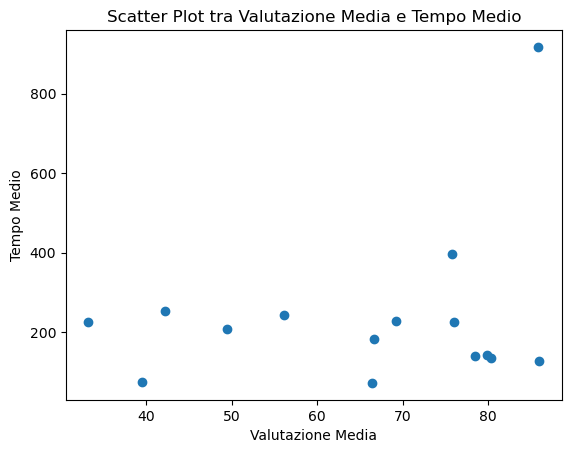

,valutazione_media,tempo_medio
document_id,,
B00004SVUZ,49.431818,207.062
B00006JN5L,39.500000,74.638
B0001DHQPI,75.833333,396.858
B0002KMHD6,42.166667,254.228
B000O39U3Q,80.400000,134.906
B001DYVHY0,78.428571,139.556
B0029MAXR2,76.000000,225.012
B003TO59D2,33.250000,226.472
B0041RUM0Q,69.194805,227.638


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#unisco i due dataframe per avere valutazione medi e tempo medio per ogni docuemnto
merged_dataset = pd.merge(media_valutazioni_D, tempo_medio_D, on='document_id')

merged_dataset = merged_dataset.rename(columns={'selection_value': 'valutazione_media',
                                                'time_spedn': 'tempo_medio'})

# Crea il grafico
plt.scatter(merged_dataset['valutazione_media'], merged_dataset['tempo_medio'])
plt.xlabel('Valutazione Media')
plt.ylabel('Tempo Medio')
plt.title('Scatter Plot tra Valutazione Media e Tempo Medio')
plt.show()

'''
Un'analisi può esser che non si notano correlazioni con tempo e valutazione, nel senso che una valutazione alta non equivale a un tempo medio elevato di rispota,
anche se poteva esser cosi perche per avere una valutazione alta, la recensione deve essere molto prolissa e ben sturitturata, quindi ci vuoleva mooto tempo ma non  e coi.
'''


display(merged_dataset)